In [1]:
import zarr
import numpy as np

root = zarr.open('../Peract2_zarr/train.zarr/', mode='r')


def print_zarr_structure(group, indent=0):
    for name, item in group.arrays():
        print("  " * indent + f"Array: {name} | Shape: {item.shape} | Dtype: {item.dtype}")
    for name, item in group.groups():
        print("  " * indent + f"Group: {name}")
        print_zarr_structure(item, indent + 1)

print_zarr_structure(root)

Array: action | Shape: (9415, 1, 2, 8) | Dtype: float32
Array: action_joints | Shape: (9415, 1, 2, 8) | Dtype: float32
Array: depth | Shape: (9415, 3, 256, 256) | Dtype: float16
Array: extrinsics | Shape: (9415, 3, 4, 4) | Dtype: float16
Array: intrinsics | Shape: (9415, 3, 3, 3) | Dtype: float16
Array: proprioception | Shape: (9415, 3, 2, 8) | Dtype: float32
Array: proprioception_joints | Shape: (9415, 1, 2, 8) | Dtype: float32
Array: rgb | Shape: (9415, 3, 3, 256, 256) | Dtype: uint8
Array: task_id | Shape: (9415,) | Dtype: uint8
Array: variation | Shape: (9415,) | Dtype: uint8


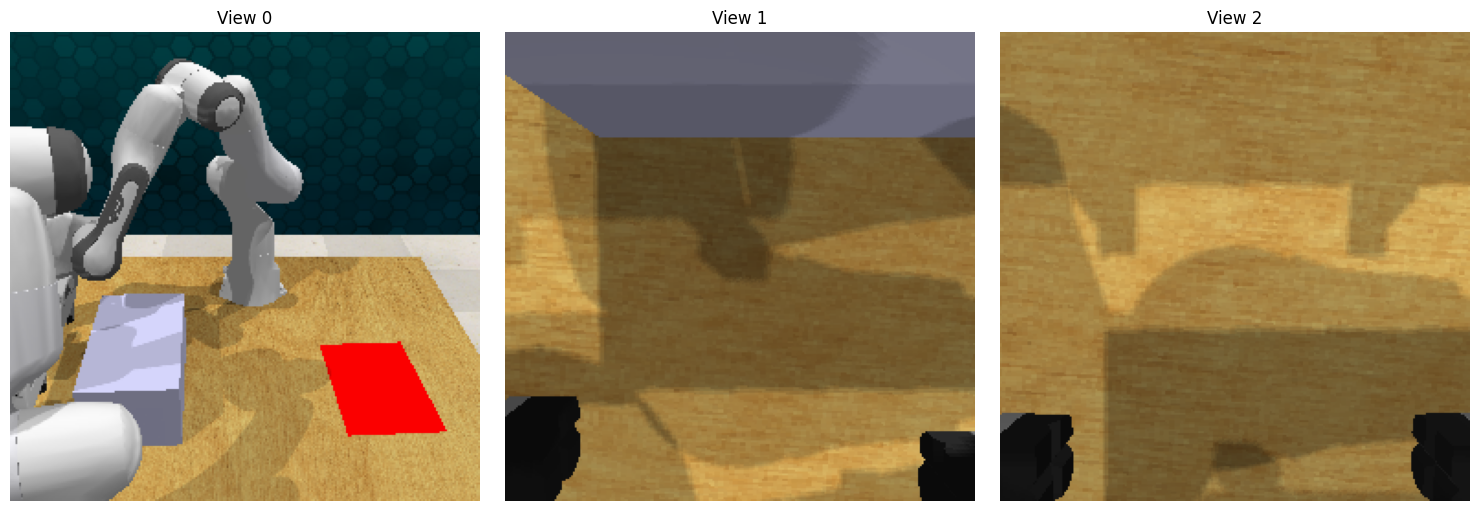

In [4]:
import zarr
import matplotlib.pyplot as plt
import numpy as np


rgb_data = root['rgb']

# 2. Pick a middle frame to ensure the robot is in a meaningful pose
frame_idx = 40
sample_images = rgb_data[frame_idx] # Shape: (3, 3, 256, 256)

# 3. Plotting
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
camera_names = ["Camera 0", "Camera 1", "Camera 2"]

for i in range(3):
    # Zarr stores as (C, H, W), Matplotlib needs (H, W, C)
    img = np.transpose(sample_images[i], (1, 2, 0))
    axes[i].imshow(img)
    axes[i].set_title(f"View {i}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()

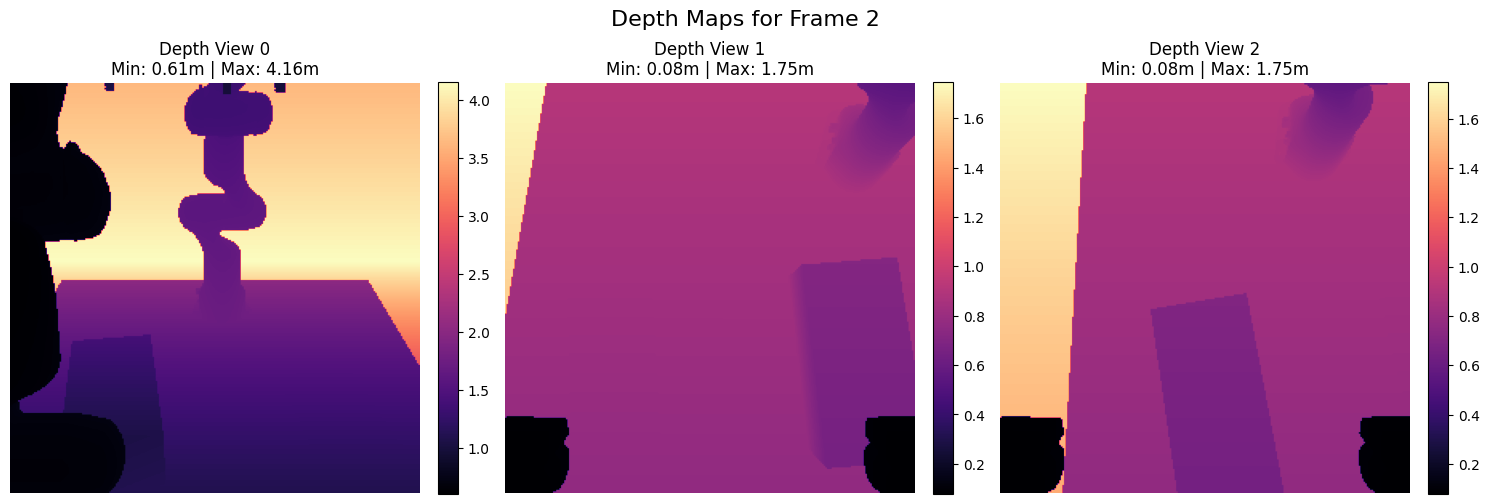

Global Stats for Frame 2:
Absolute Min Depth: 0.0779 meters
Absolute Max Depth: 4.1562 meters


In [6]:
import zarr
import matplotlib.pyplot as plt
import numpy as np

# 1. Open depth data
depth_data = root['depth'] # Shape: (9415, 3, 256, 256)

# 2. Extract specific frame
frame_idx = 2
sample_depth = depth_data[frame_idx].astype(np.float32) # Convert float16 to float32 for processing

# 3. Plotting
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i in range(3):
    d_img = sample_depth[i] # Shape: (256, 256)
    
    # Calculate stats for this specific camera view
    d_min, d_max = np.min(d_img), np.max(d_img)
    d_mean = np.mean(d_img)
    
    # Use 'magma' colormap: darker is closer, lighter is further
    im = axes[i].imshow(d_img, cmap='magma')
    axes[i].set_title(f"Depth View {i}\nMin: {d_min:.2f}m | Max: {d_max:.2f}m")
    axes[i].axis('off')
    
    # Add a colorbar to each subplot to visualize the scale
    plt.colorbar(im, ax=axes[i], fraction=0.046, pad=0.04)

plt.tight_layout()
plt.suptitle(f"Depth Maps for Frame {frame_idx}", fontsize=16, y=1.05)
plt.show()

# 4. Global Range Analysis
print(f"Global Stats for Frame {frame_idx}:")
print(f"Absolute Min Depth: {np.min(sample_depth):.4f} meters")
print(f"Absolute Max Depth: {np.max(sample_depth):.4f} meters")